<a href="https://colab.research.google.com/github/Atharv-M/Housing-Dataset-Regression-Model-ML/blob/main/Housing_Dataset_(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question: Feature Engineering & Model Performance Analysis

## Problem Statement

  Our task is to:

1.  **Data Preprocessing with Pandas**: Load a synthetic housing
    dataset, handle missing values using advanced techniques, create new
    engineered features, and detect outliers using statistical methods.

2.  **Machine Learning with Scikit-Learn**: Build and compare multiple
    regression models (Linear Regression) using proper cross-validation techniques.

3.  **Advanced Visualization**: Create comprehensive visualizations
    using both Matplotlib and Seaborn to analyze feature importance,
    model performance, and residual patterns.

**Specific Requirements:** - Handle missing values using KNN imputation
for numerical features and mode imputation for categorical features -
Create polynomial features and interaction terms - Use feature scaling
and selection techniques - Implement nested cross-validation for
hyperparameter tuning - Generate publication-quality plots with custom
styling



Creating a Synthetic Hosuing Dataset


 ADVANCED HOUSE PRICE PREDICTION ANALYSIS 
Creating synthetic Housing Dataset....
===ADVANCED DATA PREPROCSESSING===
Shape of the Dataset: (2000, 11)

 Missing Values per column: 
sqft_living      0
bedrooms         0
bathrooms      200
floors           0
waterfront       0
view           200
condition        0
grade            0
yr_built       200
zipcode          0
price            0
dtype: int64

===Feature Engineering===
['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode']

===Outlier Detection===
Column sqft_living: 14 outliers detected
Column price: 21 outliers detected
Column bathrooms: 24 outliers detected
Total unique outliers: 57
Dataset shape after outlier removal: (1943, 17)

--- Training Linear Regression---
Best parameters: {'poly__degree': 1, 'selector__k': 12}
RMSE: $65,966.32
MAE: $53,681.10
R²: 0.8387

--- Training Random Forest---
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimato

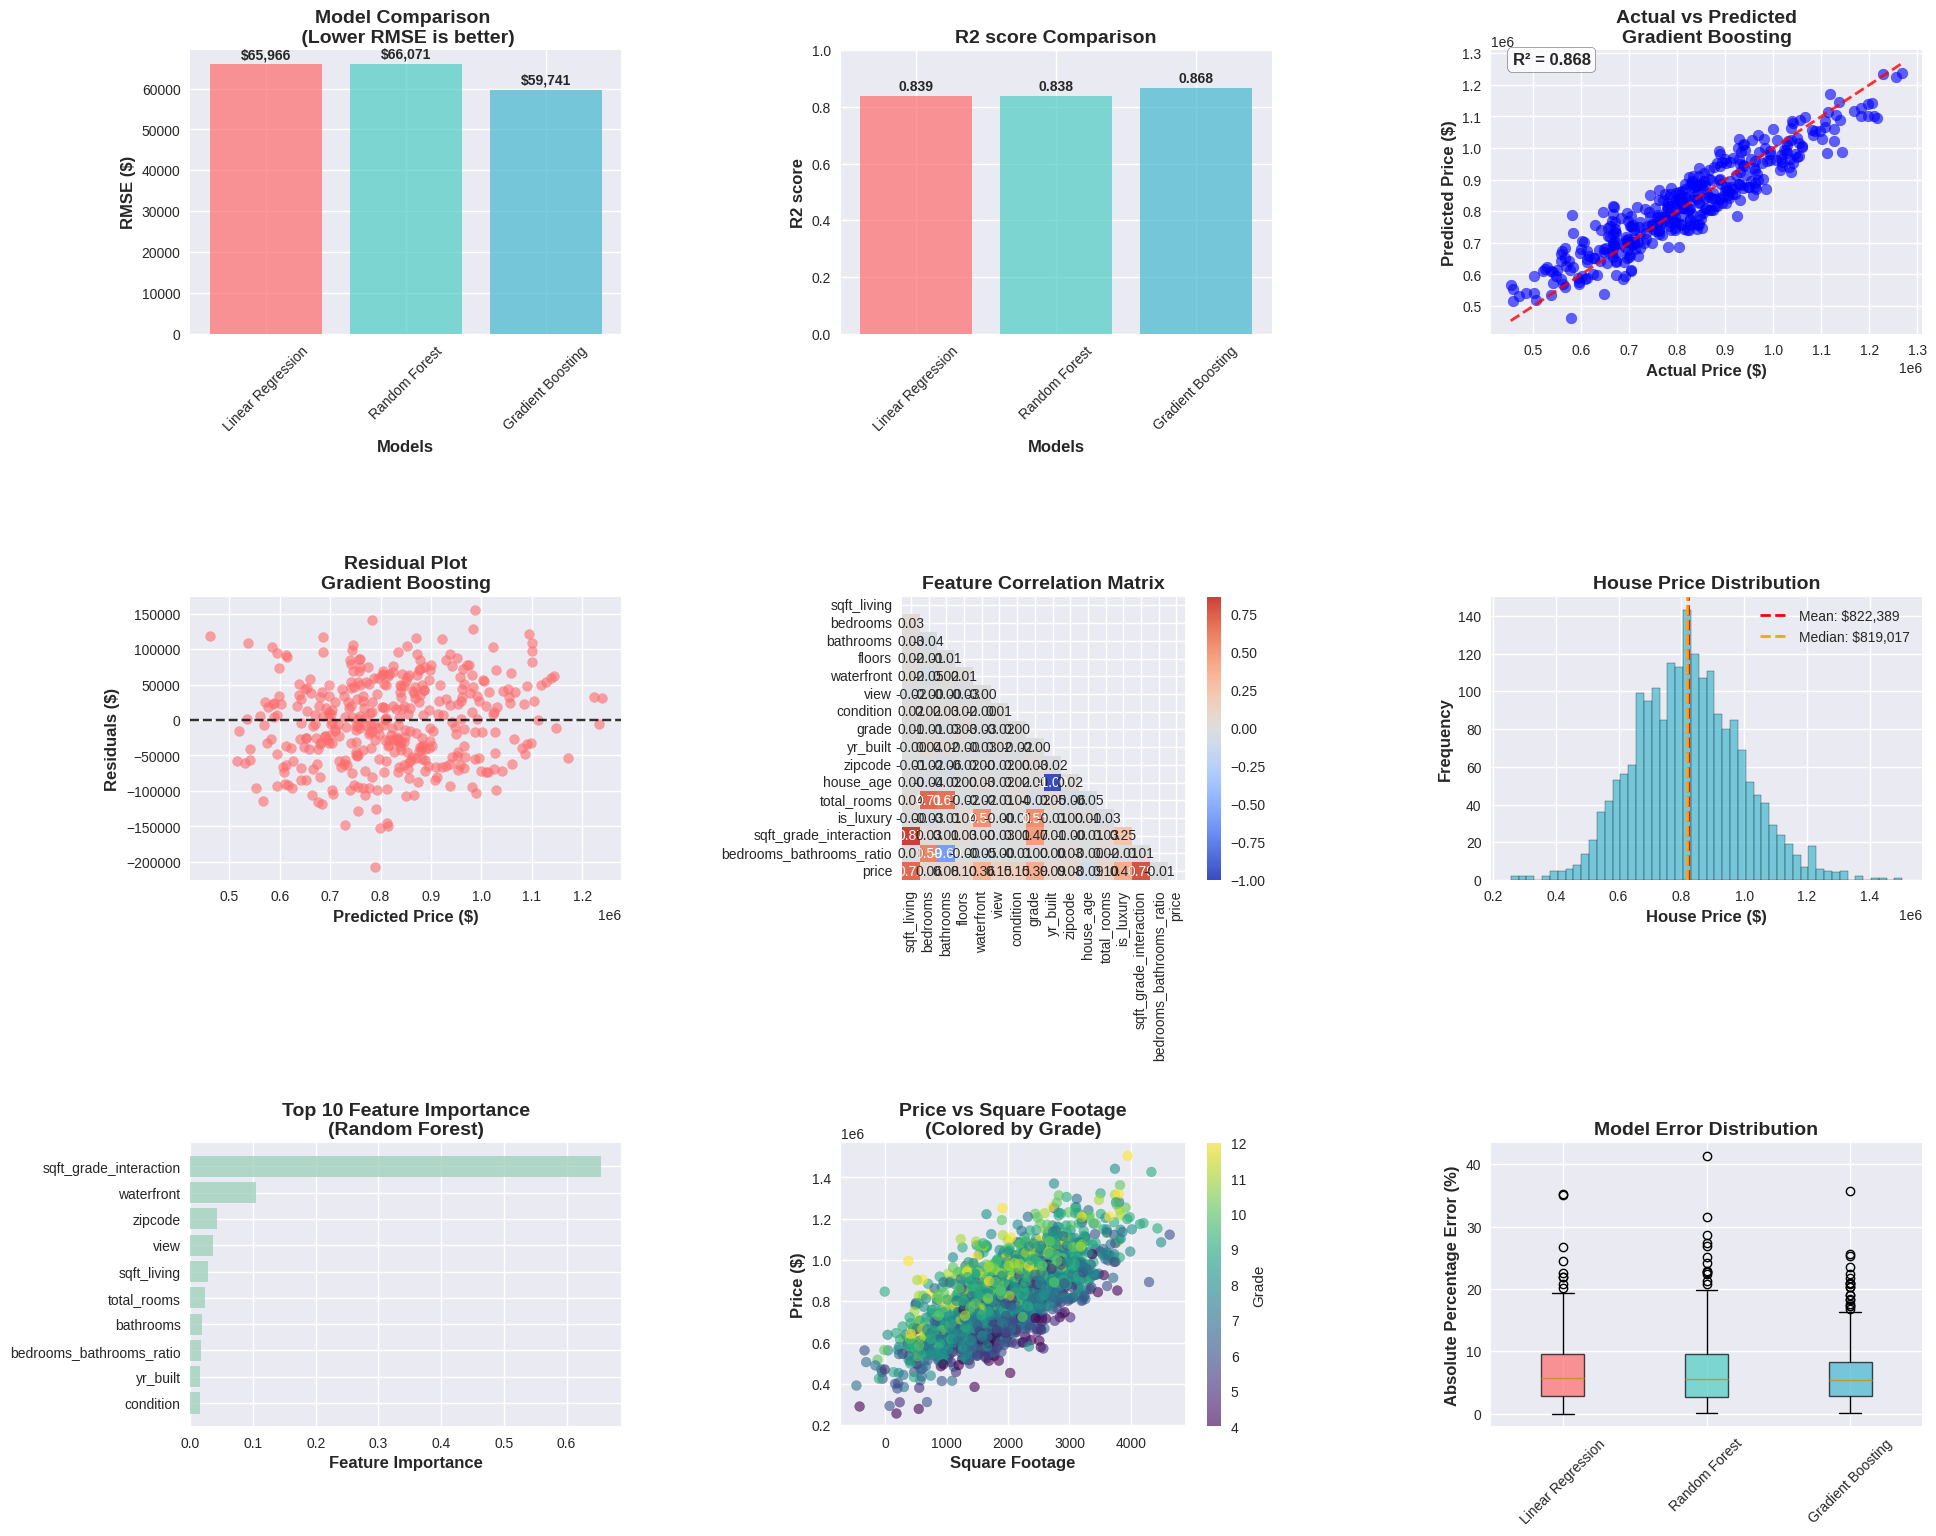

************************************************************
Final Result Summary
************************************************************
Model: Linear Regression
Best Parameters: {'poly__degree': 1, 'selector__k': 12}
RMSE: $65,966.32
MAE: $53,681.10
R2: 0.8387
Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: $66,071.20
MAE: $52,883.81
R2: 0.8382
Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
RMSE: $59,741.25
MAE: $49,233.01
R2: 0.8677

 BEST MODEL: Gradient Boosting
   RMSE: $59741.25


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# set random seed for Reproducibility
np.random.seed(42)
# Step 1: Create synthetic housing dataset
def create_synthetic_housing_data(n_samples=1000):
    """Create a synthetic dataset mimicking real housing data"""
    data = {
        'sqft_living': np.random.normal(2000, 800, n_samples),
        'bedrooms': np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.1, 0.2, 0.4, 0.25, 0.05]),
        'bathrooms': np.random.normal(2.5, 1, n_samples),
        'floors': np.random.choice([1, 2, 3], n_samples, p=[0.6, 0.35, 0.05]),
        'waterfront': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
        'view': np.random.choice([0, 1, 2, 3, 4], n_samples, p=[0.6, 0.2, 0.1, 0.07, 0.03]),
        'condition': np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.05, 0.1, 0.6, 0.2, 0.05]),
        'grade': np.random.choice([4, 5, 6, 7, 8, 9, 10, 11, 12], n_samples,
                                p=[0.02, 0.05, 0.1, 0.2, 0.25, 0.2, 0.1, 0.06, 0.02]),
        'yr_built': np.random.choice(range(1900, 2021), n_samples),
        'zipcode': np.random.choice([98001, 98002, 98003, 98004, 98005], n_samples)
    }

    df = pd.DataFrame(data)

    # Create price based on features with some noise
    df['price'] = (
        df['sqft_living'] * 150 +
        df['bedrooms'] * 10000 +
        df['bathrooms'] * 15000 +
        df['floors'] * 20000 +
        df['waterfront'] * 200000 +
        df['view'] * 30000 +
        df['condition'] * 25000 +
        df['grade'] * 40000 +
        (2021 - df['yr_built']) * -500 +
        np.where(df['zipcode'] == 98004, 100000, 0) +  # Premium zipcode
        np.random.normal(0, 50000, n_samples)  # Random noise
    )

    # Introduce missing values randomly
    missing_cols = ['bathrooms', 'view', 'yr_built']
    for col in missing_cols:
        missing_idx = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)
        df.loc[missing_idx, col] = np.nan

    return df

# Step 2: Advance Data Preprocessing
def advanced_preprocessing(df):
  print("===ADVANCED DATA PREPROCSESSING===")

  #Initial Data Exploration
  print(f"Shape of the Dataset: {df.shape}")
  print(f"\n Missing Values per column: ")
  print(df.isnull().sum())

  # Seperate Numerical and Categorical Columns
  numerical_col=df.select_dtypes(include=[np.number]).columns.tolist() #it will create a list of columns with Numbers
  categorical_col=df.select_dtypes(exclude=[np.number]).columns.tolist() # it will create a lsit of columns with Other Datatype

  # Remove the target column from Numerical Columns

  if 'price' in numerical_col:
    numerical_col.remove('price')


  # Handle the Missing Values
  #KNN imputation For Numerical Features
  Knn_imputer=KNNImputer(n_neighbors=5) # Used to fill NAN values By avg of Negibour values
  df[numerical_col]=Knn_imputer.fit_transform(df[numerical_col ]) # here we are passing a names of columns with numbere in a list

  # Feature Engineering
  print("\n===Feature Engineering===")

  #Create New Features
  df['house_age'] = 2021 - df['yr_built']
  df['price_per_sqft'] = df['price'] / df['sqft_living']
  df['total_rooms'] = df['bedrooms'] + df['bathrooms']
  df['is_luxury'] = ((df['grade'] >= 10) | (df['waterfront'] == 1)).astype(int)

  # Create interaction features
  df['sqft_grade_interaction'] = df['sqft_living'] * df['grade']
  df['bedrooms_bathrooms_ratio'] = df['bedrooms'] / (df['bathrooms'] + 1)  # +1 to avoid division by zero
  print(numerical_col)
  #Outlier Detection Uisng IOR method
  print("\n===Outlier Detection===")
  outlier_cols=["sqft_living",'price','bathrooms']
  outlier_indices=set()

  """IQR= Inter Quartile Range that is three Quartile
    Q1=25%
    Q2=50% or mean or average
    Q3=75%
    range Q3-Q1= IOR
    All the points outside this range are Outliers"""

  for col in outlier_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_indices.update(col_outliers)
    print(f"Column {col}: {len(col_outliers)} outliers detected")
  print(f"Total unique outliers: {len(outlier_indices)}")

  # Remove outliers
  df_clean = df.drop(outlier_indices).reset_index(drop=True)
  print(f"Dataset shape after outlier removal: {df_clean.shape}")

  return df_clean

# df_clean=advanced_preprocessing(df)

#3 Adavance Machine Learning Pipeline
def build_ML_pipeline(df):
  numerical_cols=df.select_dtypes(include=[np.number]).columns.tolist() # this to dind the Numerical columns only
  feature_col=[col for col in numerical_cols if col not in["price","price_per_sqft"]] # this to remove Target cols
  X=df[feature_col]
  y=df["price"]

  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Define Models With Hyperparameters Grids
  models={
      'Linear Regression':{
          'model':Pipeline([
          ('scaler',StandardScaler()), # to standard the mean in range 0 to 1
          ('poly',PolynomialFeatures(include_bias=False)), # Defining the Equation with degree here degree=(d-1)
          ('selector',SelectKBest(f_regression,k=10)),# it is used to define how many times model run
          ('regression',LinearRegression()) # Which model we are using
          ]),
          'params':{
              'poly__degree':[1,2],
              'selector__k':[8,10,12]
          }
       },
      'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [10, 15, None],
                'min_samples_split': [2, 5]
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.05, 0.1],
                'max_depth': [3, 5]
            }
        }
  }
  # Train And Evaluate
  results={}
  for name,config in models.items():
    print(f"\n--- Training {name}---")

    #Grid search With Cross validation
    grid_search=GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    # Fit the Model
    grid_search.fit(X_train,y_train)

    #Best Model Predidction
    best_model=grid_search.best_estimator_
    y_pred=best_model.predict(X_test)

    #Calculate metrices
    mse= mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    results[name]={
        'model':best_model,
        'y_pred': y_pred,
        'mse':mse,
        'rmse':rmse,
        'mae':mae,
        'r2':r2,
        'best_params':grid_search.best_params_

    }
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"MAE: ${mae:,.2f}")
    print(f"R²: {r2:.4f}")

  return results,X_test,y_test,feature_col


#Step 4 Adavanced Visulaization
def create_advance_visulization(results,X_test,y_test,feature_col,df):
  """ Create Comprehensive Visulization """
  print("\n=== CREATING ADVANCED VISUALIZATION===")

  # Set up the Plotting Style
  plt.style.use('seaborn-v0_8')
  sns.set_palette('husl')

  # create A large Figure With Subplots
  fig=plt.figure(figsize=(20,16))
  #1 model Performance Comparisons
  ax1=plt.subplot(3,3,1)
  models=list(results.keys())
  rmse_values=[results[model]['rmse']for model in models]
  r2_values=[results[model]['r2'] for model in models]

  x_pos=np.arange(len(models))
  bars=ax1.bar(x_pos,rmse_values,alpha=0.7,color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
  ax1.set_xlabel("Models",fontsize=12,fontweight='bold')
  ax1.set_ylabel("RMSE ($)",fontsize=12,fontweight='bold')
  ax1.set_title("Model Comparison \n (Lower RMSE is better)",fontsize=14,fontweight='bold')
  ax1.set_xticks(x_pos)
  ax1.set_xticklabels(models,rotation=45)

  # Add value labels on bars
  for bar, rmse in zip(bars, rmse_values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'${rmse:,.0f}', ha='center', va='bottom', fontweight='bold')

  # Add R2 score comparison
  ax2=plt.subplot(3,3,2)
  bars2=ax2.bar(x_pos,r2_values,alpha=0.7,color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
  ax2.set_xlabel("Models",fontsize=12,fontweight='bold')
  ax2.set_ylabel("R2 score",fontsize=12,fontweight='bold')
  ax2.set_title("R2 score Comparison",fontsize=14,fontweight='bold')
  ax2.set_xticks(x_pos)
  ax2.set_xticklabels(models,rotation=45)
  ax2.set_ylim(0,1) # to setr the limits of y axis

  for bar ,r2 in zip(bars2,r2_values):
    hieght=bar.get_height()
    ax2.text(bar.get_x()+bar.get_width()/2, hieght+0.01,
             f'{r2:.3f}',ha='center',va='bottom', fontweight='bold')

  # 3 Actual Vs Pridicted for best Model
  best_model_name=min(results.keys(),key=lambda x:results[x]['rmse']) # it will find the model or select the model with lowest Rmse vale
  best_predictions=results[best_model_name]['y_pred']
  ax3=plt.subplot(3,3,3)
  ax3.scatter(y_test,best_predictions,alpha=0.6,color='b' ,s=60)
  ax3.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2,alpha=0.8)
  ax3.set_xlabel('Actual Price ($)', fontsize=12, fontweight='bold')
  ax3.set_ylabel('Predicted Price ($)', fontsize=12, fontweight='bold')
  ax3.set_title(f'Actual vs Predicted\n{best_model_name}', fontsize=14, fontweight='bold')

  # Add R² to the plot
  r2_best = results[best_model_name]['r2']
  ax3.text(0.05, 0.95, f'R² = {r2_best:.3f}', transform=ax3.transAxes,
          fontsize=12, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

  # 4. Residual Plot
  ax4 = plt.subplot(3, 3, 4)
  residuals = y_test - best_predictions
  ax4.scatter(best_predictions, residuals, alpha=0.6, color='#FF6B6B', s=50)
  ax4.axhline(y=0, color='black', linestyle='--', alpha=0.8)
  ax4.set_xlabel('Predicted Price ($)', fontsize=12, fontweight='bold')
  ax4.set_ylabel('Residuals ($)', fontsize=12, fontweight='bold')
  ax4.set_title(f'Residual Plot\n{best_model_name}', fontsize=14, fontweight='bold')

  # 5. Feature Correlation Heatmap
  ax5 = plt.subplot(3, 3, 5)
  correlation_matrix = df[feature_col + ['price']].corr()
  mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
  sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
              center=0, ax=ax5, fmt='.2f', square=True)
  ax5.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

  # 6. Price Distribution
  ax6 = plt.subplot(3, 3, 6)
  ax6.hist(df['price'], bins=50, alpha=0.7, color='#45B7D1', edgecolor='black')
  ax6.axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["price"].mean():,.0f}')
  ax6.axvline(df['price'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: ${df["price"].median():,.0f}')
  ax6.set_xlabel('House Price ($)', fontsize=12, fontweight='bold')
  ax6.set_ylabel('Frequency', fontsize=12, fontweight='bold')
  ax6.set_title('House Price Distribution', fontsize=14, fontweight='bold')
  ax6.legend()

  # 7. Feature Importance (for Random Forest)
  if 'Random Forest' in results:
      ax7 = plt.subplot(3, 3, 7)
      rf_model = results['Random Forest']['model']
      importances = rf_model.feature_importances_
      feature_importance_df = pd.DataFrame({
          'feature': feature_col,
          'importance': importances
      }).sort_values('importance', ascending=True).tail(10)

      ax7.barh(range(len(feature_importance_df)), feature_importance_df['importance'],
              alpha=0.7, color='#96CEB4')
      ax7.set_yticks(range(len(feature_importance_df)))
      ax7.set_yticklabels(feature_importance_df['feature'])
      ax7.set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
      ax7.set_title('Top 10 Feature Importance\n(Random Forest)', fontsize=14, fontweight='bold')

  # 8. Price vs Square Footage
  ax8 = plt.subplot(3, 3, 8)
  scatter = ax8.scatter(df['sqft_living'], df['price'], c=df['grade'],
                        cmap='viridis', alpha=0.6, s=50)
  ax8.set_xlabel('Square Footage', fontsize=12, fontweight='bold')
  ax8.set_ylabel('Price ($)', fontsize=12, fontweight='bold')
  ax8.set_title('Price vs Square Footage\n(Colored by Grade)', fontsize=14, fontweight='bold')
  plt.colorbar(scatter, ax=ax8, label='Grade')

  # 9. Model Comparison Box Plot
  ax9 = plt.subplot(3, 3, 9)
  error_data = []
  model_names = []
  for name, result in results.items():
      errors = np.abs(y_test - result['y_pred']) / y_test * 100  # Percentage error
      error_data.append(errors)
      model_names.append(name)

  bp = ax9.boxplot(error_data, labels=model_names, patch_artist=True)
  colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
  for patch, color in zip(bp['boxes'], colors):
      patch.set_facecolor(color)
      patch.set_alpha(0.7)

  ax9.set_ylabel('Absolute Percentage Error (%)', fontsize=12, fontweight='bold')
  ax9.set_title('Model Error Distribution', fontsize=14, fontweight='bold')
  ax9.set_xticklabels(model_names, rotation=45)

  plt.tight_layout(pad=3.0)
  plt.show()

# Main Exextuion Function
def main():
  """ Execute the complete Machine Learning Pipeline"""
  print("\n ADVANCED HOUSE PRICE PREDICTION ANALYSIS ")
  print("="*60)

  # Step 1 Create and Load Data
  print("Creating synthetic Housing Dataset....")
  df=create_synthetic_housing_data(2000)

  #Step 2 Advanced Preprocessing
  df_clean=advanced_preprocessing(df)

  #Step3 Machine Learning Pipeline
  results,X_test,y_test,feature_col=build_ML_pipeline(df_clean)

  #Step 4 Advanced Visualization
  create_advance_visulization(results,X_test,y_test,feature_col,df)

  #Step 5 Summary
  print("*"*60)
  print("Final Result Summary")
  print("*"*60)
  for name,result in results.items():
    print(f"Model: {name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"RMSE: ${result['rmse']:,.2f}")
    print(f"MAE: ${result['mae']:,.2f}")
    print(f"R2: {result['r2']:.4f}")
    print("="*60)
  # Find the best Model
  best_model_name=min(results.keys(),key=lambda x: results[x]["rmse"])
  print(f"\n BEST MODEL: {best_model_name}")
  print(f"   RMSE: ${results[best_model_name]['rmse']:.2f}")
  return df_clean, results

if __name__=="__main__":
  df_final,model_result=main()



 ADVANCED HOUSE PRICE PREDICTION ANALYSIS
============================================================
Creating synthetic Housing Dataset....
===ADVANCED DATA PREPROCSESSING===
Shape of the Dataset: (2000, 11)

 Missing Values per column:
sqft_living      0
bedrooms         0
bathrooms      200
floors           0
waterfront       0
view           200
condition        0
grade            0
yr_built       200
zipcode          0
price            0
dtype: int64

===Feature Engineering===
['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode']

===Outlier Detection===
Column sqft_living: 14 outliers detected
Column price: 21 outliers detected
Column bathrooms: 24 outliers detected
Total unique outliers: 57
Dataset shape after outlier removal: (1943, 17)

--- Training Linear Regression---
Best parameters: {'poly__degree': 1, 'selector__k': 12}
RMSE: $65,966.32
MAE: $53,681.10
R²: 0.8387

--- Training Random Forest---
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: $66,071.20
MAE: $52,883.81
R²: 0.8382

--- Training Gradient Boosting---
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
RMSE: $59,741.25
MAE: $49,233.01
R²: 0.8677

=== CREATING ADVANCED VISUALIZATION===

************************************************************
Final Result Summary
************************************************************
Model: Linear Regression
Best Parameters: {'poly__degree': 1, 'selector__k': 12}
RMSE: $65,966.32
MAE: $53,681.10
R2: 0.8387
============================================================
Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: $66,071.20
MAE: $52,883.81
R2: 0.8382
============================================================
Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
RMSE: $59,741.25
MAE: $49,233.01
R2: 0.8677
============================================================

 BEST MODEL: Gradient Boosting
   RMSE: $59741.25